### 문제2. 자유곡선을 그려서 crop 및 masking하기

In [1]:
from IPython.display import Image 

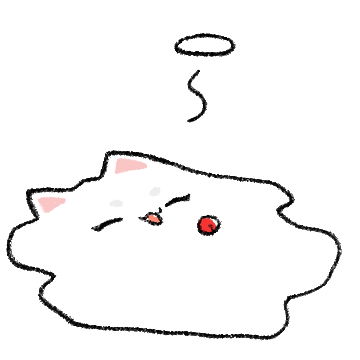

In [4]:
Image("06_냥바타콘_03_녹음.png")

``` 이미 녹아버린것 같당..```

### 우선 점을 연결해서 동형을 만들어서 crop 및 마스킹 하는 방식
```
다만, 곡선은 아니고 직선 형태로 구현한 코드이다.
```

In [ ]:
import cv2
import numpy as np

# 마우스로 자유곡선을 그리는 함수
def draw_poly(event, x, y, flags, param):
    global points, draw_poly_flag, img_copy
    if event == cv2.EVENT_LBUTTONDOWN:
        points = [(x, y)]
        draw_poly_flag = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if draw_poly_flag:
            points.append((x, y))
            cv2.line(img_copy, points[-2], points[-1], (0, 255, 0), 2)
    elif event == cv2.EVENT_LBUTTONUP:
        draw_poly_flag = False
        if len(points) > 2:
            # 부드러운 곡선 근사
            epsilon = 0.1 * cv2.arcLength(np.array(points), True)
            approx = cv2.approxPolyDP(np.array(points), epsilon, True)
            # 곡선 그리기
            cv2.polylines(img_copy, [approx], True, (0, 255, 0), 2)
            # 자유곡선으로 crop된 이미지 저장
            mask = np.zeros((height, width), dtype=np.uint8)
            cv2.fillPoly(mask, [approx], 255)
            masked_img = cv2.bitwise_and(img, img, mask=mask)
            cv2.imwrite('masked_image.jpg', masked_img)
            # 완성된 사각형 부분 이미지 저장
            rect = cv2.boundingRect(approx)
            x, y, w, h = rect
            cropped_img = img[y:y+h, x:x+w]
            cv2.imwrite('cropped_image.jpg', cropped_img)

# 이미지 파일 경로
img_path = 'cat.bmp'

# 이미지 읽기
img = cv2.imread(img_path)

# 이미지 크기
height, width = img.shape[:2]

# 자유곡선 그리기
points = []
draw_poly_flag = False
img_copy = img.copy()
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_poly)

while True:
    cv2.imshow('image', img_copy)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows()

### 자유곡선은 그렸지만, 최적의 외각 사각형은 만들지 못한 코드
```
이거 관련해서는 문서나 기존 코드를 변형해야할 필요가 있다
```

In [ ]:
import cv2
import numpy as np

# 마우스로 자유곡선을 그리는 함수
def draw_poly(event, x, y, flags, param):
    global points, draw_poly_flag, img_copy
    if event == cv2.EVENT_LBUTTONDOWN:
        points = [(x, y)]
        draw_poly_flag = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if draw_poly_flag:
            points.append((x, y))
            cv2.line(img_copy, points[-2], points[-1], (0, 255, 0), 2)
    elif event == cv2.EVENT_LBUTTONUP:
        draw_poly_flag = False
        if len(points) > 2:
            # 부드러운 곡선 근사
            epsilon = 0.1 * cv2.arcLength(np.array(points), True)
            approx = cv2.approxPolyDP(np.array(points), epsilon, True)
            # 곡선 그리기
            cv2.polylines(img_copy, [approx], True, (0, 255, 0), 2)
            # 자유곡선을 따라 crop
            mask = np.zeros((height, width), dtype=np.uint8)
            cv2.fillPoly(mask, [approx], 255)
            masked_img = cv2.bitwise_and(img, img, mask=mask)
            x, y, w, h = cv2.boundingRect(np.array(points))
            cropped_img = masked_img[y:y+h, x:x+w]
            cv2.imwrite('cropped_image.jpg', cropped_img)
            # 자유곡선으로 crop된 이미지 저장
            cv2.imwrite('masked_image.jpg', masked_img)

# 이미지 파일 경로
img_path = 'cat.bmp'

# 이미지 읽기
img = cv2.imread(img_path)

# 이미지 크기
height, width = img.shape[:2]

# 자유곡선 그리기
points = []
draw_poly_flag = False
img_copy = img.copy()
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_poly)

while True:
    cv2.imshow('image', img_copy)
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cv2.destroyAllWindows()

### 생긴 에러


### 응답없음
```
입력이미지 변수명문제이거나 그 그림 위치나 크기관련해서 넣는 변수를 다시 생각해보자.. ex) [:,1]
```